# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are 4 functions you need to complete to have a working project. These functions are described using the RE formula, which stands for Requires and Effects. Each function will have its own RE located directly above the function definition. The Requires section describes what is needed in the function argument (inbetween the function definition parenthesis). The Effects portion outlines what the function is supposed to do. 
5. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import PIL
import zipfile
import pytesseract
import cv2 as cv
import numpy as np
import kraken
from kraken import pageseg
from PIL import ImageDraw
from PIL import Image
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [2]:
# Extarcting Images from Zip file
##==================================================##
global img_names
zip_file = zipfile.ZipFile('readonly/images.zip')
img_names = zip_file.namelist()
zip_file.extractall('readonly/Untitled Folder')
##==================================================##

In [3]:
# Importing Images
##=============================================================##
images = []
for i in img_names:
    images.append(Image.open('readonly/Untitled Folder/' + i))
##=============================================================##

In [4]:
print(images[0])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=3600x6300 at 0x7F769F82A3C8>


In [5]:
global struct
struct = {}
for i in img_names:
    struct[i] = {}

In [6]:
text = []
# Extarcting Text from images
##==========================================##
text.append(pytesseract.image_to_string(images[0]))
##==========================================##

In [7]:
## Importing Images for Face Detection
##=============================================================##
cv_images = []
for i in img_names:
    cv_images.append(cv.imread('readonly/Untitled Folder/' + i))
##=============================================================##

In [8]:
count = 0
for i in img_names:
    struct[i]['PIL_img'] = images[count]
    struct[i]['cv_img'] = cv_images[count]
    count+= 1

In [9]:
count = 0
for i in img_names:
    struct[i]['text'] = pytesseract.image_to_string(images[count])
    count += 1

In [33]:
def detect_faces(img):
    ## Detecting Faces
    ##=====================================================================================================##
    faces = face_cascade.detectMultiScale(struct[img]['cv_img'], scaleFactor=2.0, minNeighbors=2, minSize=(10, 10))
    if faces == ():
        return "No face detected"
    ##=====================================================================================================##
    ## Drawing Rectangles on the image
    ##==================================================##
    img_copy = struct[img]['PIL_img'].copy()
    drawing=ImageDraw.Draw(img_copy)
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    ##=================================================##
    ##Cropping faces out of main image
    ##=================================================##
    cr_img = struct[img]['PIL_img'].copy()
    cropped_faces = []
    for face in faces:
        x1 = face[0]
        x2 = face[0] + face[2]
        y1 = face[1]
        y2 = face[1] + face[3]
        cropped_faces.append(cr_img.crop((x1, y1, x2, y2)))
    ##=================================================##
    ##Resizing cropped images to 100x100 Res.
    ##=================================================##
    new = []
    lst = []
    for crop in cropped_faces:
        crop.thumbnail((100, 100))
    for i in cropped_faces:
        if i.size[0] and i.size[1] < 100:
            cropped_faces.remove(i)
    ##==============================##
    # creating a contact sheet of faces detected
    ##========================================================================================##
    if cropped_faces == []:
        return "No face detected"
    first_image=cropped_faces[0]
    contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
    x=0
    y=0
    for img in cropped_faces:
    # Pasting the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )
        if x+first_image.width == contact_sheet.width:
            x=0
            y=y+first_image.height
        else:
            x=x+first_image.width
    # resize and display the contact sheet
    contact_sheet = contact_sheet.resize((int(contact_sheet.width),int(contact_sheet.height) ))
    #=========================================================================================##
    return contact_sheet

In [34]:

for i in img_names:
    struct[i]['cover'] = detect_faces(i)

Enter word to search:Mark
Result found in file a-0.png


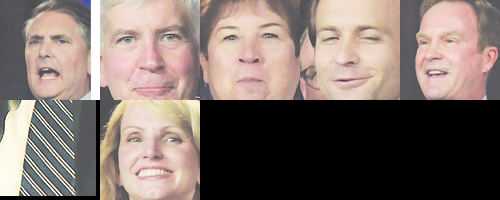

Result found in file a-1.png


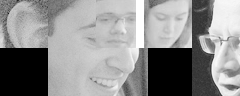

Result found in file a-10.png


'No face detected'

Result found in file a-13.png


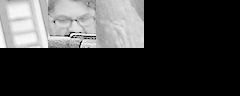

Result found in file a-2.png


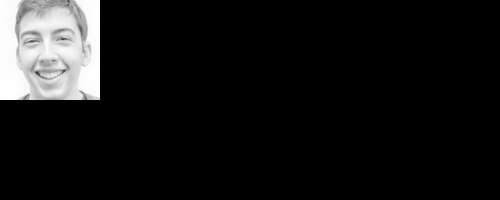

Result found in file a-3.png


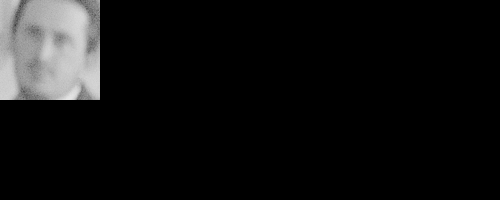

Result found in file a-8.png


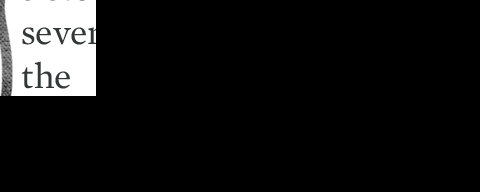

In [35]:
user_in = input('Enter word to search:')
for i in img_names:
    if user_in in struct[i]['text']:
        print('Result found in file {}'. format(i))
        display(struct[i]['cover'])